# Laboratorio 4 Parte 2- Análisis de modelos usando datos geospaciales

### Sebastián Juárez - 21471
### Juan Pablo Cordón - 21458
Link al github: https://github.com/SebasJuarez/DS-Collection/tree/Lab4

In [14]:
import pandas as pd
import numpy as np

atitlan = pd.read_csv("atitlan_indices_todas_las_fechas.csv")

atitlan["date"] = pd.to_datetime(atitlan["date"], format="%Y-%m-%d")

atitlan.head()

,date,coverage_pct,coverage_pct_poly,coverage_pct_water,chl_mean,chl_median,chl_p95,ndvi_mean,ndwi_mean,valid_px,water_px
0,2025-02-07,0.205518,0.205518,0.999811,-1.318510e+10,4.746356,1204.932007,0.904062,9.587302,981862,982048
1,2025-02-10,0.000263,0.000263,1.000000,4.040736e+00,4.260046,4.732763,-0.135770,0.436340,1258,1258
2,2025-02-25,0.049464,0.049464,1.000000,5.287579e-01,3.963018,4.691946,0.308929,0.595625,236316,236316
3,2025-02-27,0.268881,0.268881,0.999948,3.224710e+00,3.596182,4.517667,-0.143003,0.403314,1284579,1284646
4,2025-03-02,0.028497,0.028497,1.000000,-2.103549e+09,3.172209,10.806772,0.289753,0.760607,136144,136144


### Series de tiempo

In [17]:
# Crear serie temporal de chl_p95
chl_p95 = atitlan["chl_p95"]
chl_p95.index = atitlan["date"]
chl_median = atitlan["chl_median"]
chl_median.index = atitlan["date"]

chl_p95 

date
2025-02-07    1204.932007
2025-02-10       4.732763
2025-02-25       4.691946
2025-02-27       4.517667
2025-03-02      10.806772
2025-03-04       4.512647
2025-03-07     675.900330
2025-03-09       4.435485
2025-03-12       4.896786
2025-03-14       4.448634
2025-03-19       4.597617
2025-03-22    4779.981787
2025-03-24       4.604187
2025-03-26       5.286236
Name: chl_p95, dtype: float64

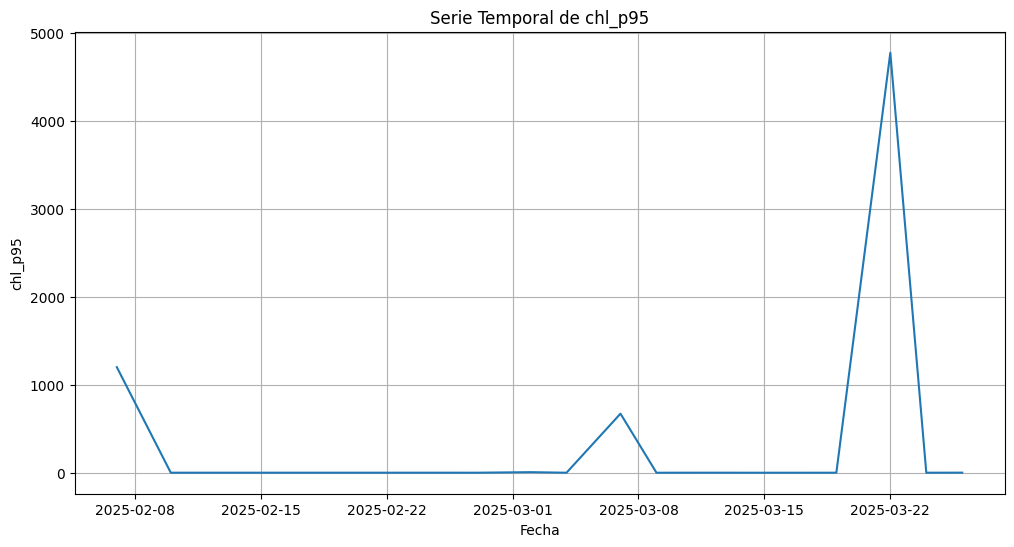

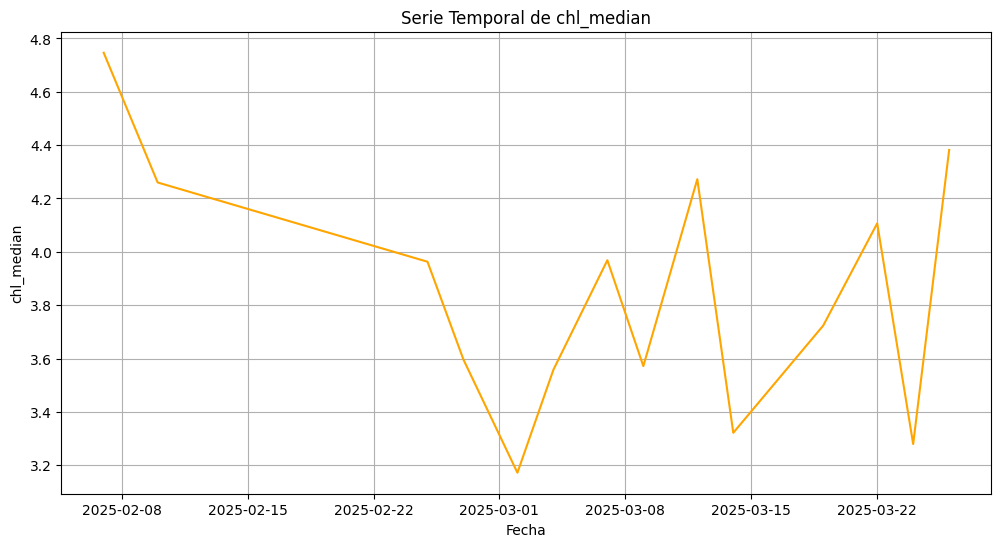

In [19]:
# Grafica serie temporal chl_p95
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(chl_p95.index, chl_p95.values)
plt.title("Serie Temporal de chl_p95")
plt.xlabel("Fecha")
plt.ylabel("chl_p95")
plt.grid(True)
plt.show()

# Graficar chl_median
plt.figure(figsize=(12, 6))
plt.plot(chl_median.index, chl_median.values, color='orange')
plt.title("Serie Temporal de chl_median")
plt.xlabel("Fecha")
plt.ylabel("chl_median")
plt.grid(True)
plt.show()

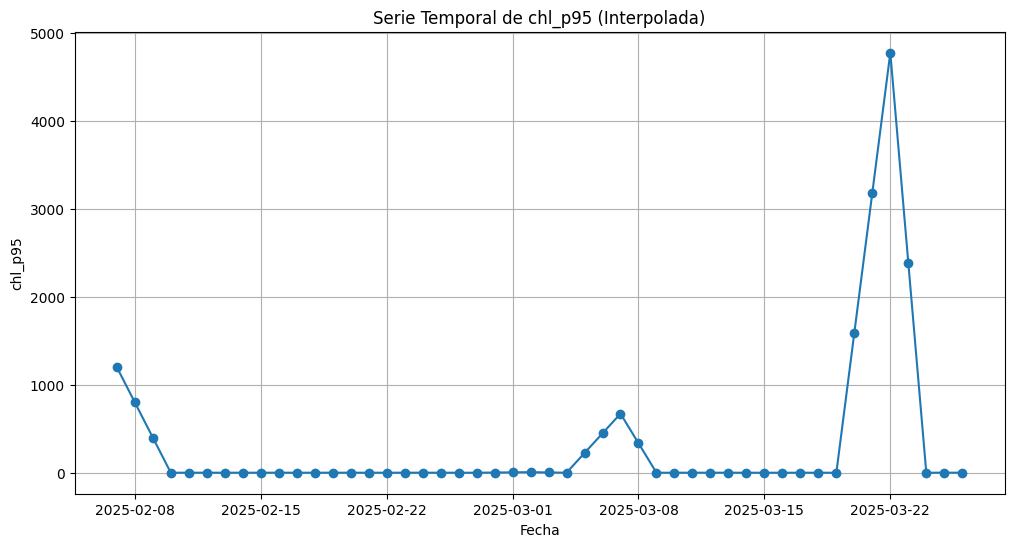

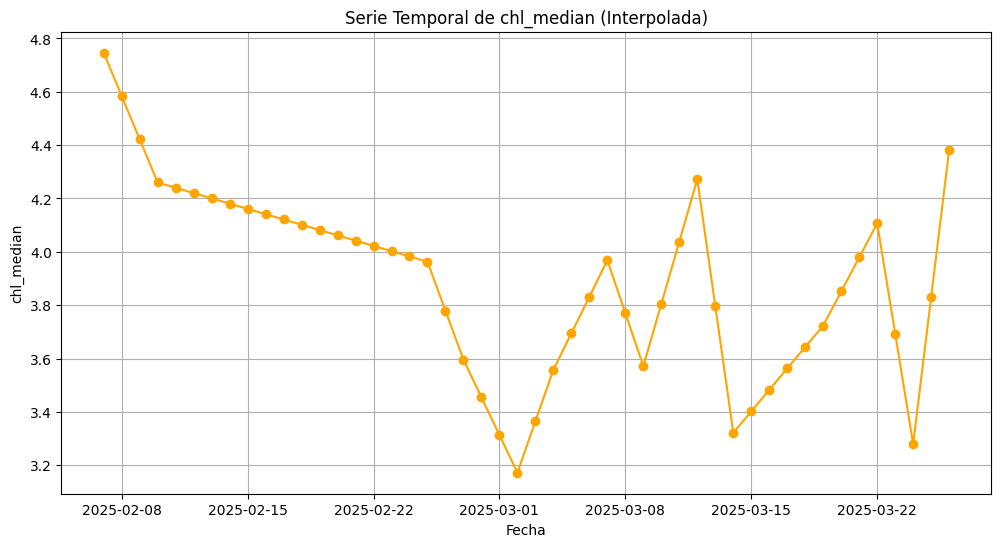

In [24]:
# Interpolar datos para suavizar
chl_p95 = chl_p95.resample("D").interpolate()
chl_median = chl_median.resample("D").interpolate()

# Graficar con datos interpolados
plt.figure(figsize=(12, 6))
plt.plot(chl_p95.index, chl_p95.values, marker='o')
plt.title("Serie Temporal de chl_p95 (Interpolada)")
plt.xlabel("Fecha")
plt.ylabel("chl_p95")
plt.grid(True)
plt.show()

# Graficar chl_median
plt.figure(figsize=(12, 6))
plt.plot(chl_median.index, chl_median.values, color='orange', marker='o')
plt.title("Serie Temporal de chl_median (Interpolada)")
plt.xlabel("Fecha")
plt.ylabel("chl_median")
plt.grid(True)
plt.show()

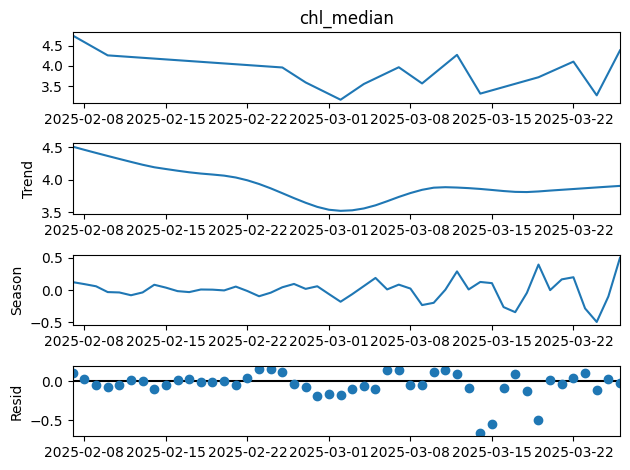

In [29]:
from statsmodels.tsa.seasonal import STL

res = STL(chl_median.dropna(), period=7, robust=True).fit()
res.plot()
plt.show()

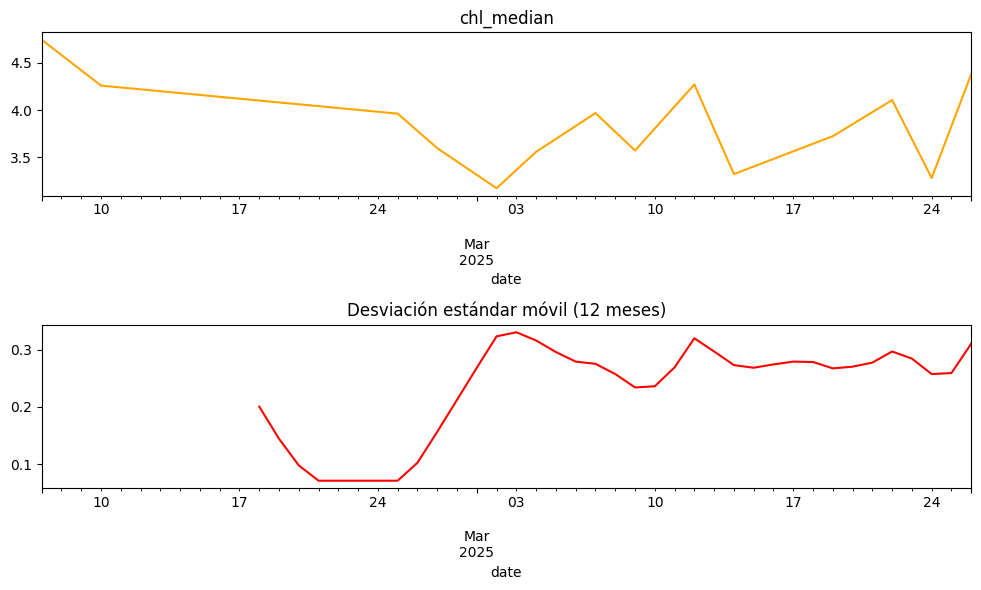

In [31]:
desvMovil = chl_median.rolling(window=12).std()

fig, ax = plt.subplots(2, 1, figsize=(10,6))
chl_median.plot(ax=ax[0], color="orange", title="chl_median")
desvMovil.plot(ax=ax[1], color="red", title="Desviación estándar móvil (12 meses)")
plt.tight_layout()
plt.show()

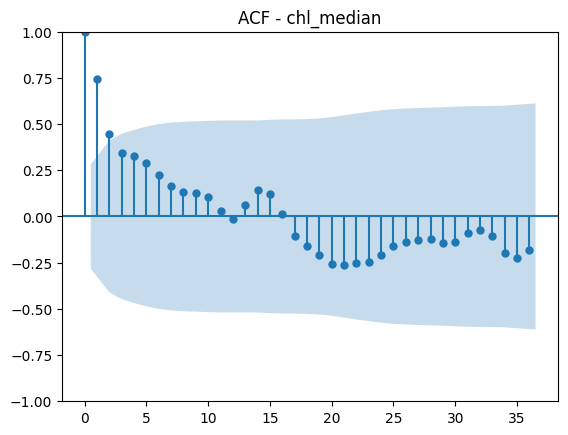

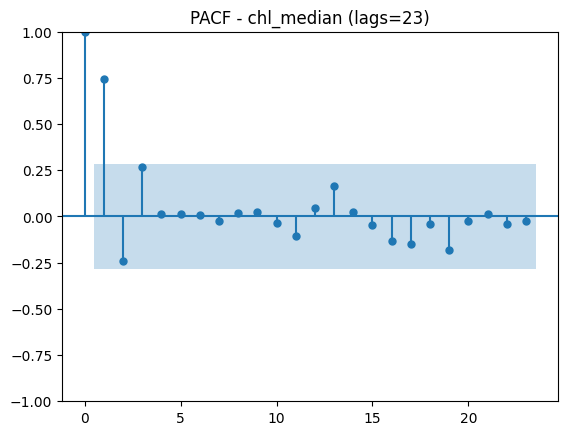

ADF: estadístico=-2.485, p-valor=0.119


In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF y PACF
plot_acf(chl_median.dropna(), lags=36)
plt.title("ACF - chl_median")
plt.show()

# Calcular lags máximo permitido para PACF
max_lags = int(len(chl_median.dropna()) // 2) - 1
plot_pacf(chl_median.dropna(), lags=max_lags, method="ywm")
plt.title(f"PACF - chl_median (lags={max_lags})")
plt.show()

# Prueba ADF
stat, pval, lags, nobs, _, _ = adfuller(chl_median.dropna(), autolag="AIC")
print(f"ADF: estadístico={stat:.3f}, p-valor={pval:.3f}")


### Siguientes pasos: Ajuste y validación de modelo ARIMA

1. Ajustar un modelo ARIMA usando los parámetros sugeridos (p=1, d=0 o 1, q=1).
2. Comparar diferentes combinaciones de parámetros usando AIC/BIC.
3. Analizar los residuos del modelo para verificar que no haya autocorrelación.
4. Realizar predicciones y comparar con los datos reales.

A continuación se muestra el código para ajustar y validar el modelo ARIMA.